# COMAP 2023 Wordle (Problem C) # 2316611

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [63]:
DATA_FILE = '../data/Problem_C_Data_Wordle.xlsx'
df = pd.read_excel(DATA_FILE,header=1)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3


In [64]:
df.rename(columns={'Date':'date','Contest number':'contest_num','Word':'word','Number of reported results':'num_results','Number in hard mode':'num_hardmode','1 try':'in1','2 tries':'in2','3 tries':'in3','4 tries':'in4','5 tries':'in5','6 tries':'in6','7 or more tries (X)':'over6'},inplace=True)

In [65]:
df[~(df['word'].apply(len) == 5)]

,date,contest_num,word,Number of reported results,num_hardmode,in1,in2,in3,in4,in5,in6,over6
15,2022-12-16,545,rprobe,22853,2160,0,6,24,32,24,11,3
35,2022-11-26,525,clen,26381,2424,1,17,36,31,12,3,0
246,2022-04-29,314,tash,106652,7001,2,19,34,27,13,4,1
353,2022-01-12,207,favor,137586,3073,1,4,15,26,29,21,4


In [66]:
df.loc[15,'word'] = 'probe'
df.loc[35,'word'] = 'clean'
df.loc[246,'word'] = 'trash'
df.loc[353,'word'] = 'favor'

In [77]:
df['letter1'] = df.word.apply(lambda x: ord(x[0])-96)
df['letter2'] = df.word.apply(lambda x: ord(x[1])-96)
df['letter3'] = df.word.apply(lambda x: ord(x[2])-96)
df['letter4'] = df.word.apply(lambda x: ord(x[3])-96)
df['letter5'] = df.word.apply(lambda x: ord(x[4])-96)

In [110]:
X = df[['contest_num','letter1','letter2','letter3','letter4','letter5']]
y = df[['in1','in2','in3','in4','in5','in6','over6']]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [113]:
y_train.

,in1,in2,in3,in4,in5,in6,over6
332,3,13,32,29,16,7,1
283,1,4,22,35,26,11,2
3,0,3,21,40,25,9,1
116,0,4,19,27,21,16,13
76,1,8,29,36,19,6,1
...,...,...,...,...,...,...,...
71,0,4,18,30,28,17,3
106,0,0,4,11,15,22,48
270,0,2,14,32,32,17,3
348,1,8,32,32,18,8,2


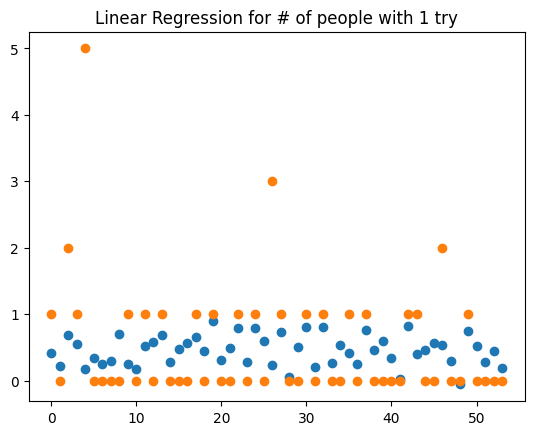

In [122]:
model=LinearRegression()
model.fit(X_train,y_train.in1)
preds = model.predict(X_test)

x = range(len(preds))
plt.title('Linear Regression for # of people with 1 try')
plt.scatter(x,preds)
plt.scatter(x,y_test.in1)
plt.show()

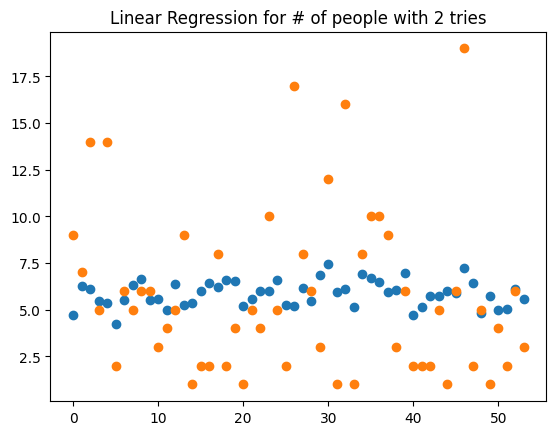

In [116]:
model=LinearRegression()
model.fit(X_train,y_train.in2)
preds = model.predict(X_test)

x = range(len(preds))
plt.title('Linear Regression for # of people with 2 tries')
plt.scatter(x,preds)
plt.scatter(x,y_test.in2)
plt.show()

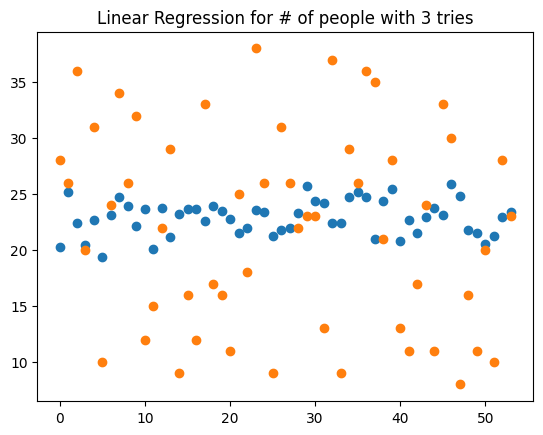

In [117]:
model=LinearRegression()
model.fit(X_train,y_train.in3)
preds = model.predict(X_test)

x = range(len(preds))
plt.title('Linear Regression for # of people with 3 tries')
plt.scatter(x,preds)
plt.scatter(x,y_test.in3)
plt.show()

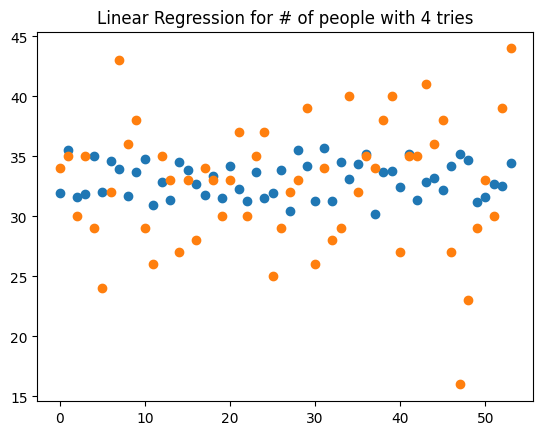

In [118]:
model=LinearRegression()
model.fit(X_train,y_train.in4)
preds = model.predict(X_test)

x = range(len(preds))
plt.title('Linear Regression for # of people with 4 tries')
plt.scatter(x,preds)
plt.scatter(x,y_test.in4)
plt.show()

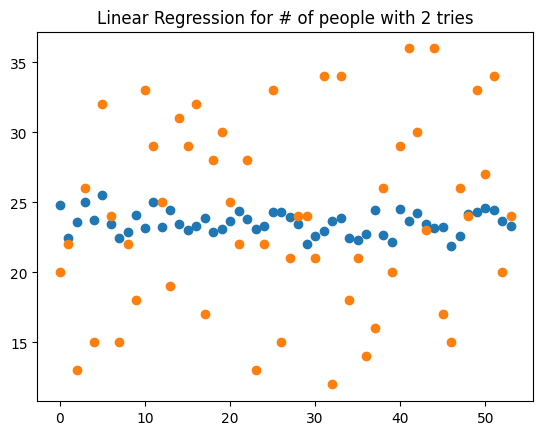

In [119]:
model=LinearRegression()
model.fit(X_train,y_train.in5)
preds = model.predict(X_test)

x = range(len(preds))
plt.title('Linear Regression for # of people with 2 tries')
plt.scatter(x,preds)
plt.scatter(x,y_test.in5)
plt.show()

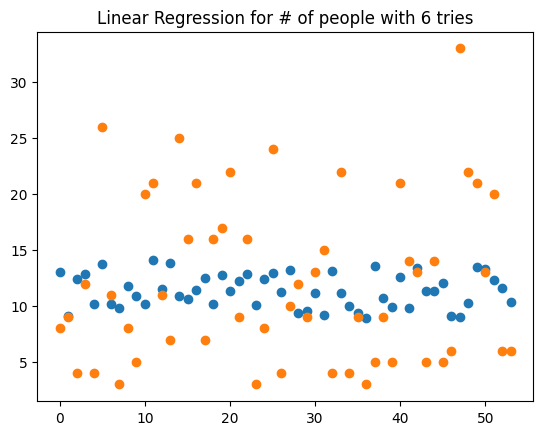

In [120]:
model=LinearRegression()
model.fit(X_train,y_train.in6)
preds = model.predict(X_test)

x = range(len(preds))
plt.title('Linear Regression for # of people with 6 tries')
plt.scatter(x,preds)
plt.scatter(x,y_test.in6)
plt.show()

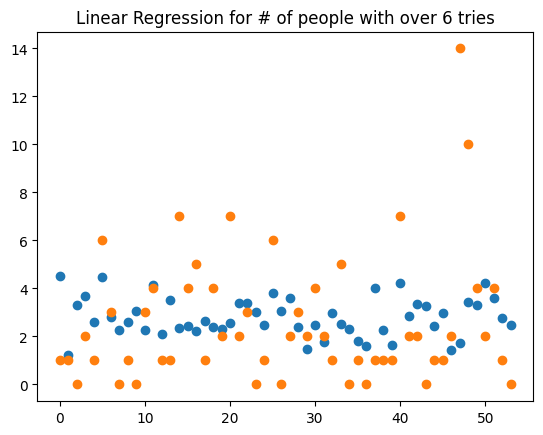

In [121]:
model=LinearRegression()
model.fit(X_train,y_train.over6)
preds = model.predict(X_test)

x = range(len(preds))
plt.title('Linear Regression for # of people with over 6 tries')
plt.scatter(x,preds)
plt.scatter(x,y_test.over6)
plt.show()